Import các thư viện cần thiết

In [1]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import contextily as ctx
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

Thiết lập nền trắng của plot

In [2]:
sns.set_style('whitegrid')
%matplotlib inline

Đọc dữ liệu từ file "clean_data.csv"

In [3]:
housing = pd.read_csv('clean_data.csv')
housing

,Diện tích (m^2),Khu vực,Mô tả vị trí,Mặt tiền (m),Số phòng ngủ,WC,Giá nhà (Tỷ)
0,100,Quận Sơn Trà,NHÀ MẶT PHỐ,5,3.0,2.0,7.40
1,285,Quận Sơn Trà,CĂN HỘ CHUNG CƯ,13,3.0,3.0,25.00
2,285,Quận Sơn Trà,CĂN HỘ CHUNG CƯ,13,3.0,3.0,25.00
3,285,Quận Sơn Trà,CĂN HỘ CHUNG CƯ,13,3.0,3.0,0.07
4,285,Quận Sơn Trà,CĂN HỘ CHUNG CƯ,13,7.0,10.0,25.00
...,...,...,...,...,...,...,...
1307,52,Quận Ngũ Hành Sơn,NHÀ MẶT PHỐ,5,2.0,2.0,3.15
1308,90,Quận Sơn Trà,NHÀ MẶT PHỐ,5,2.0,2.0,4.60
1309,60,Quận Liên Chiểu,NHÀ TRONG NGÕ,4,3.0,3.0,3.35
1310,85,Quận Liên Chiểu,NHÀ MẶT PHỐ,5,2.0,2.0,3.99


Sử dụng biểu đồ pairplot để biểu diễn mối quan hệ cũng như sự tương quan, phân phối giữa các biến số trong bộ dữ liệu

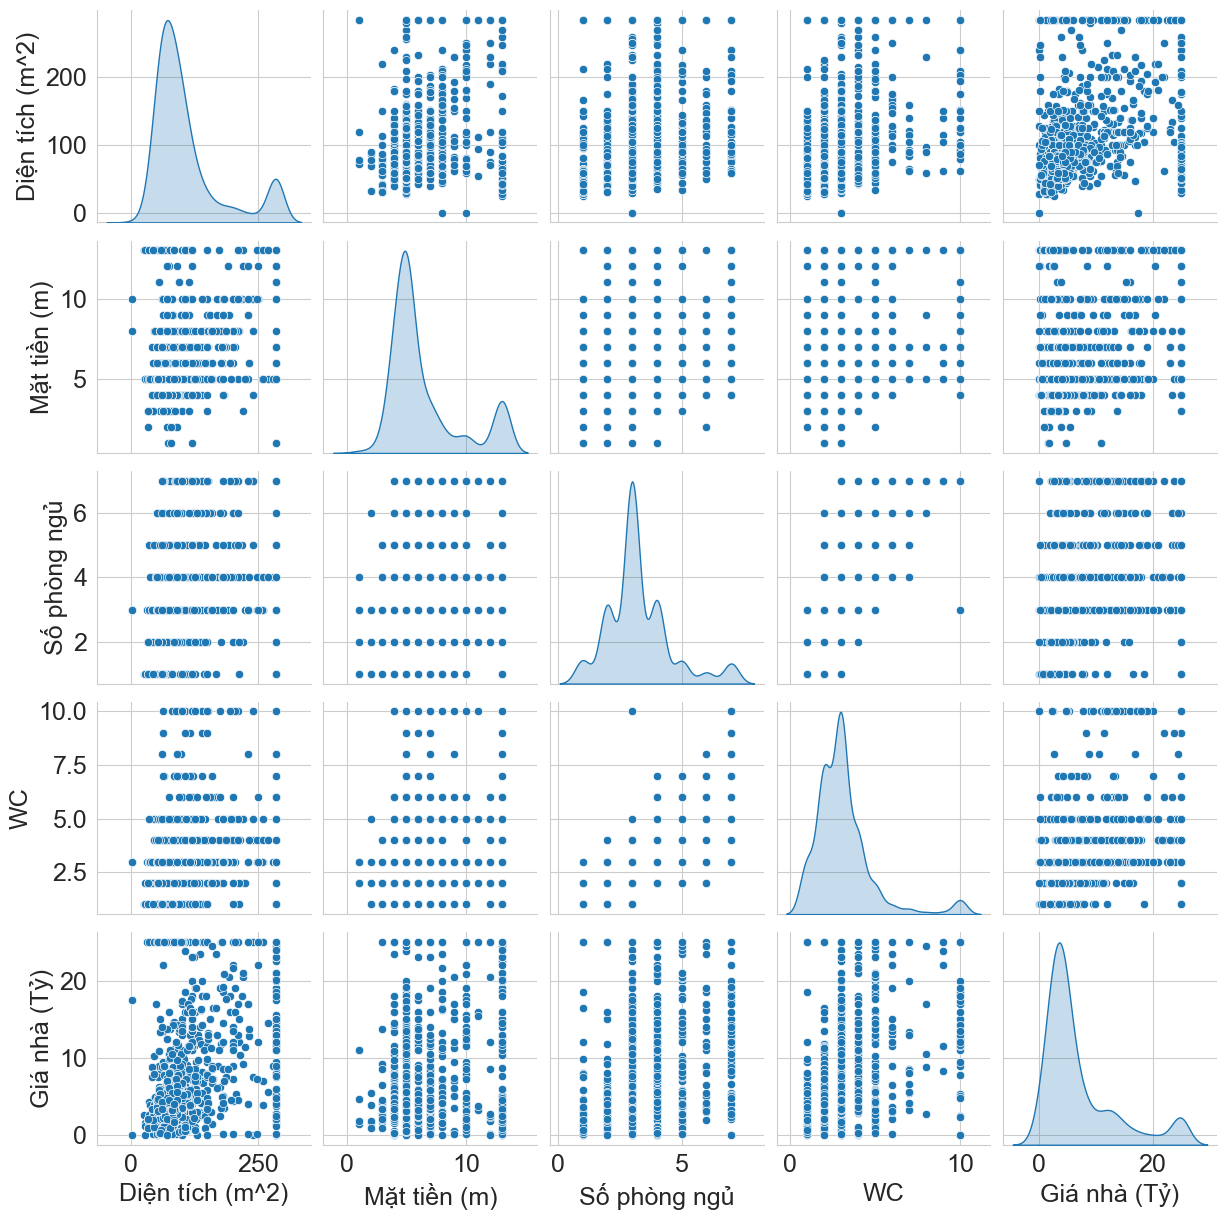

In [4]:
sns.pairplot(housing, diag_kind="kde")
plt.show()

Cũng là biểu diễn mối quan hệ cũng như sự tương quan, phân phối giữa các cặp biến mục tiêu và biến độc lập nhưng sử dụng hàm regplot với đường hồi quy (linear regression line) được thêm vào nhằm chỉ rõ hơn sự tương quan thuận hay nghịch của cặp biến đó 

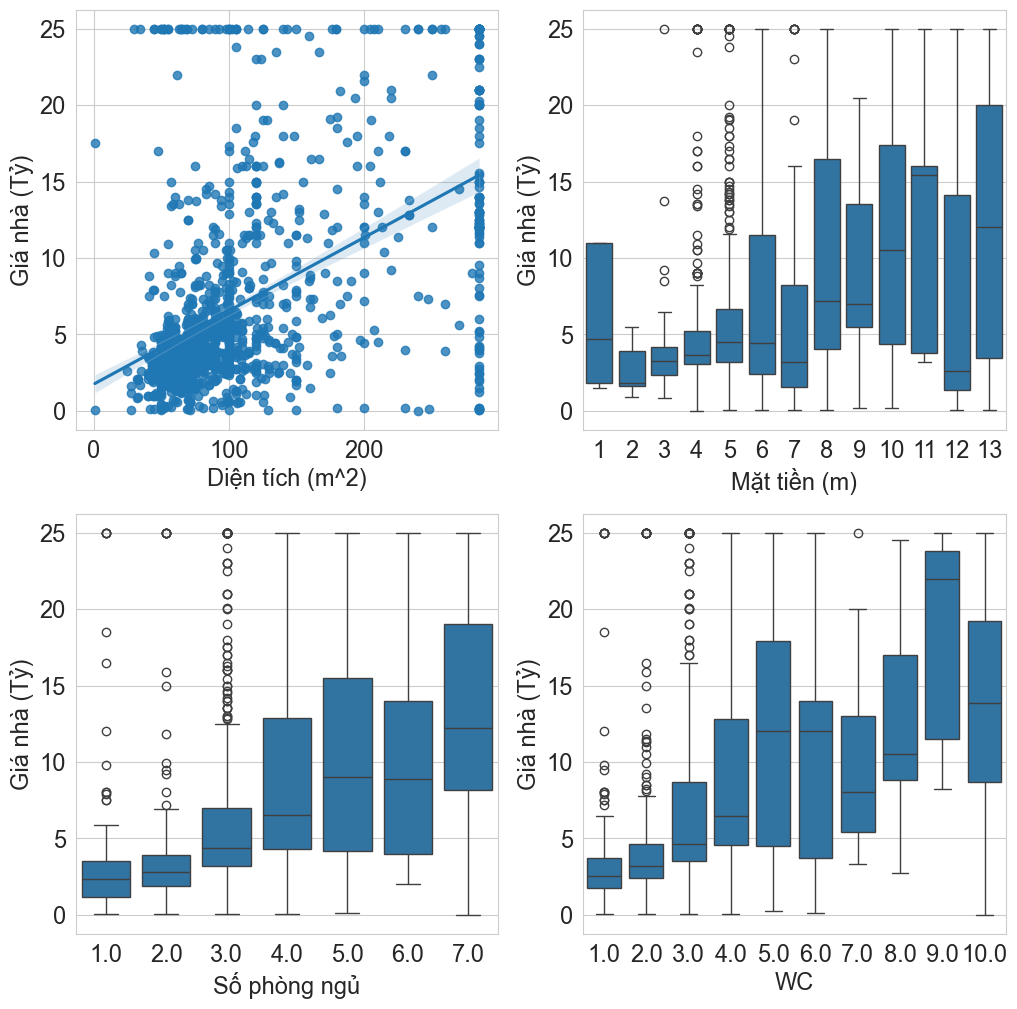

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
sns.regplot(data=housing, x="Diện tích (m^2)", y="Giá nhà (Tỷ)", ax=axs[0, 0])
sns.boxplot(data=housing, x="Mặt tiền (m)", y="Giá nhà (Tỷ)", ax=axs[0, 1])
sns.boxplot(data=housing, x="Số phòng ngủ", y="Giá nhà (Tỷ)", ax=axs[1, 0])
sns.boxplot(data=housing, x="WC", y="Giá nhà (Tỷ)", ax=axs[1, 1])
plt.show()

Sử dụng biểu đồ heatmap để biểu diễn sự tương quan dựa trên màu sắc

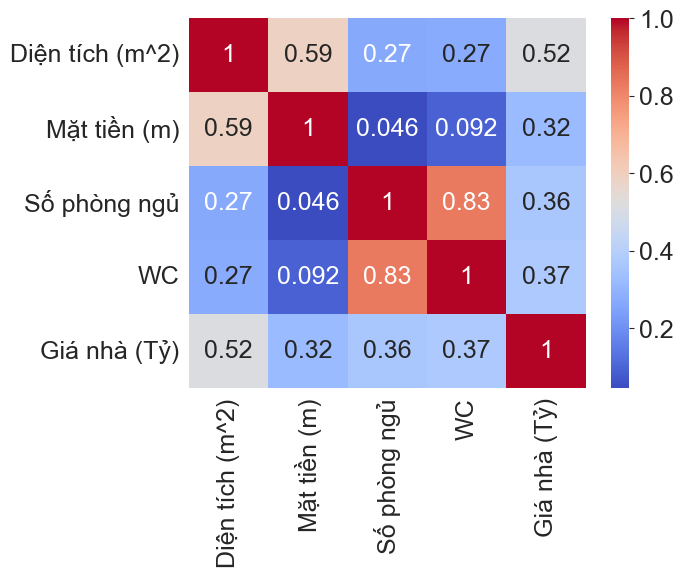

In [6]:
corr = housing[['Diện tích (m^2)', 'Mặt tiền (m)', 'Số phòng ngủ', 'WC', 'Giá nhà (Tỷ)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Sử dụng displot từ thư viện seaborn để vẽ density plot dựa trên giá nhà (Tỷ) tương ứng với các yếu tố "Khu vực"

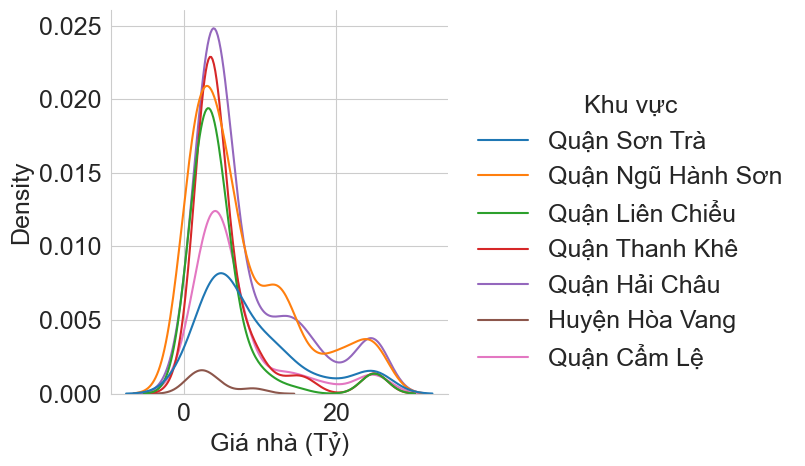

In [7]:
sns.displot(data=housing, x="Giá nhà (Tỷ)", hue="Khu vực", kind="kde")
plt.show()

Biểu đồ thể hiện giá bán trung bình của từng loại mô tả vị trí

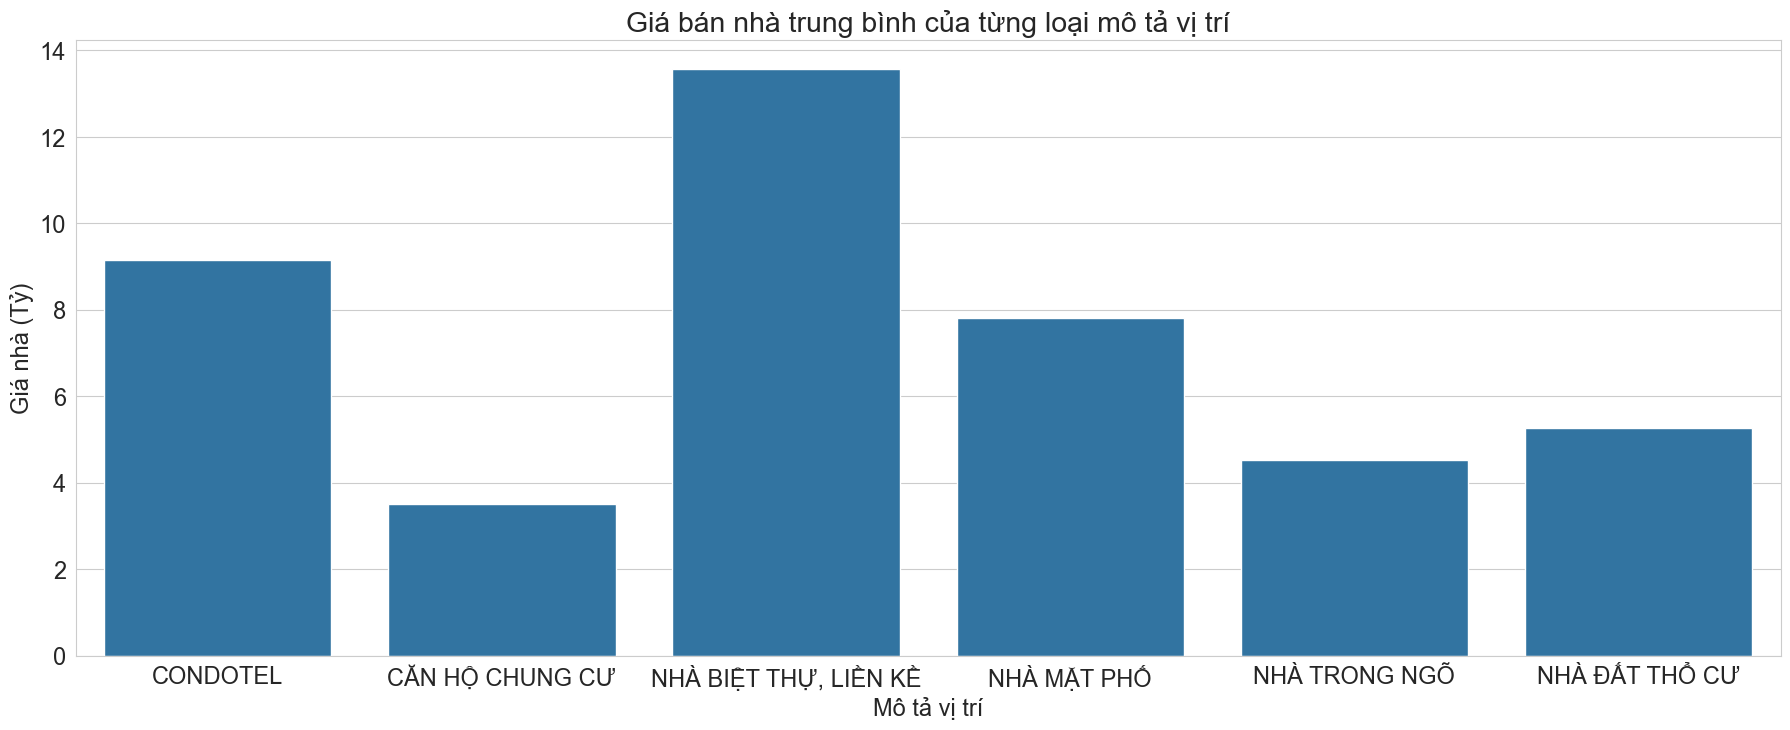

In [18]:
plt.figure(figsize=(22, 8))
mean_cost_by_location = housing.groupby('Mô tả vị trí')['Giá nhà (Tỷ)'].mean().reset_index()
sns.barplot(x='Mô tả vị trí', y='Giá nhà (Tỷ)', data=mean_cost_by_location)
plt.title('Giá bán nhà trung bình của từng loại mô tả vị trí')
plt.xlabel('Mô tả vị trí')
plt.show()

Sử dụng Scatterplot để hiển thị mối quan hệ giữa 2 biến (Diện tích (m^2) và Giá nhà (Tỷ)) nhưng thêm điều kiện là phân loại theo biến Mô tả vị trí.

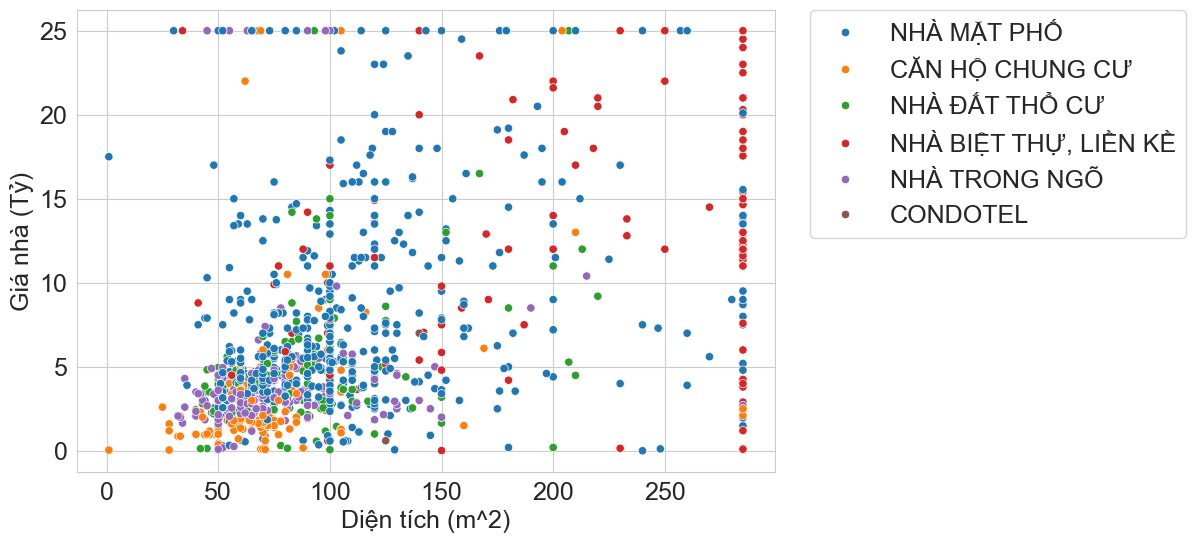

In [9]:
plt.figure(figsize=(9, 6))
sns.scatterplot(data=housing, x='Diện tích (m^2)', y='Giá nhà (Tỷ)', hue='Mô tả vị trí')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

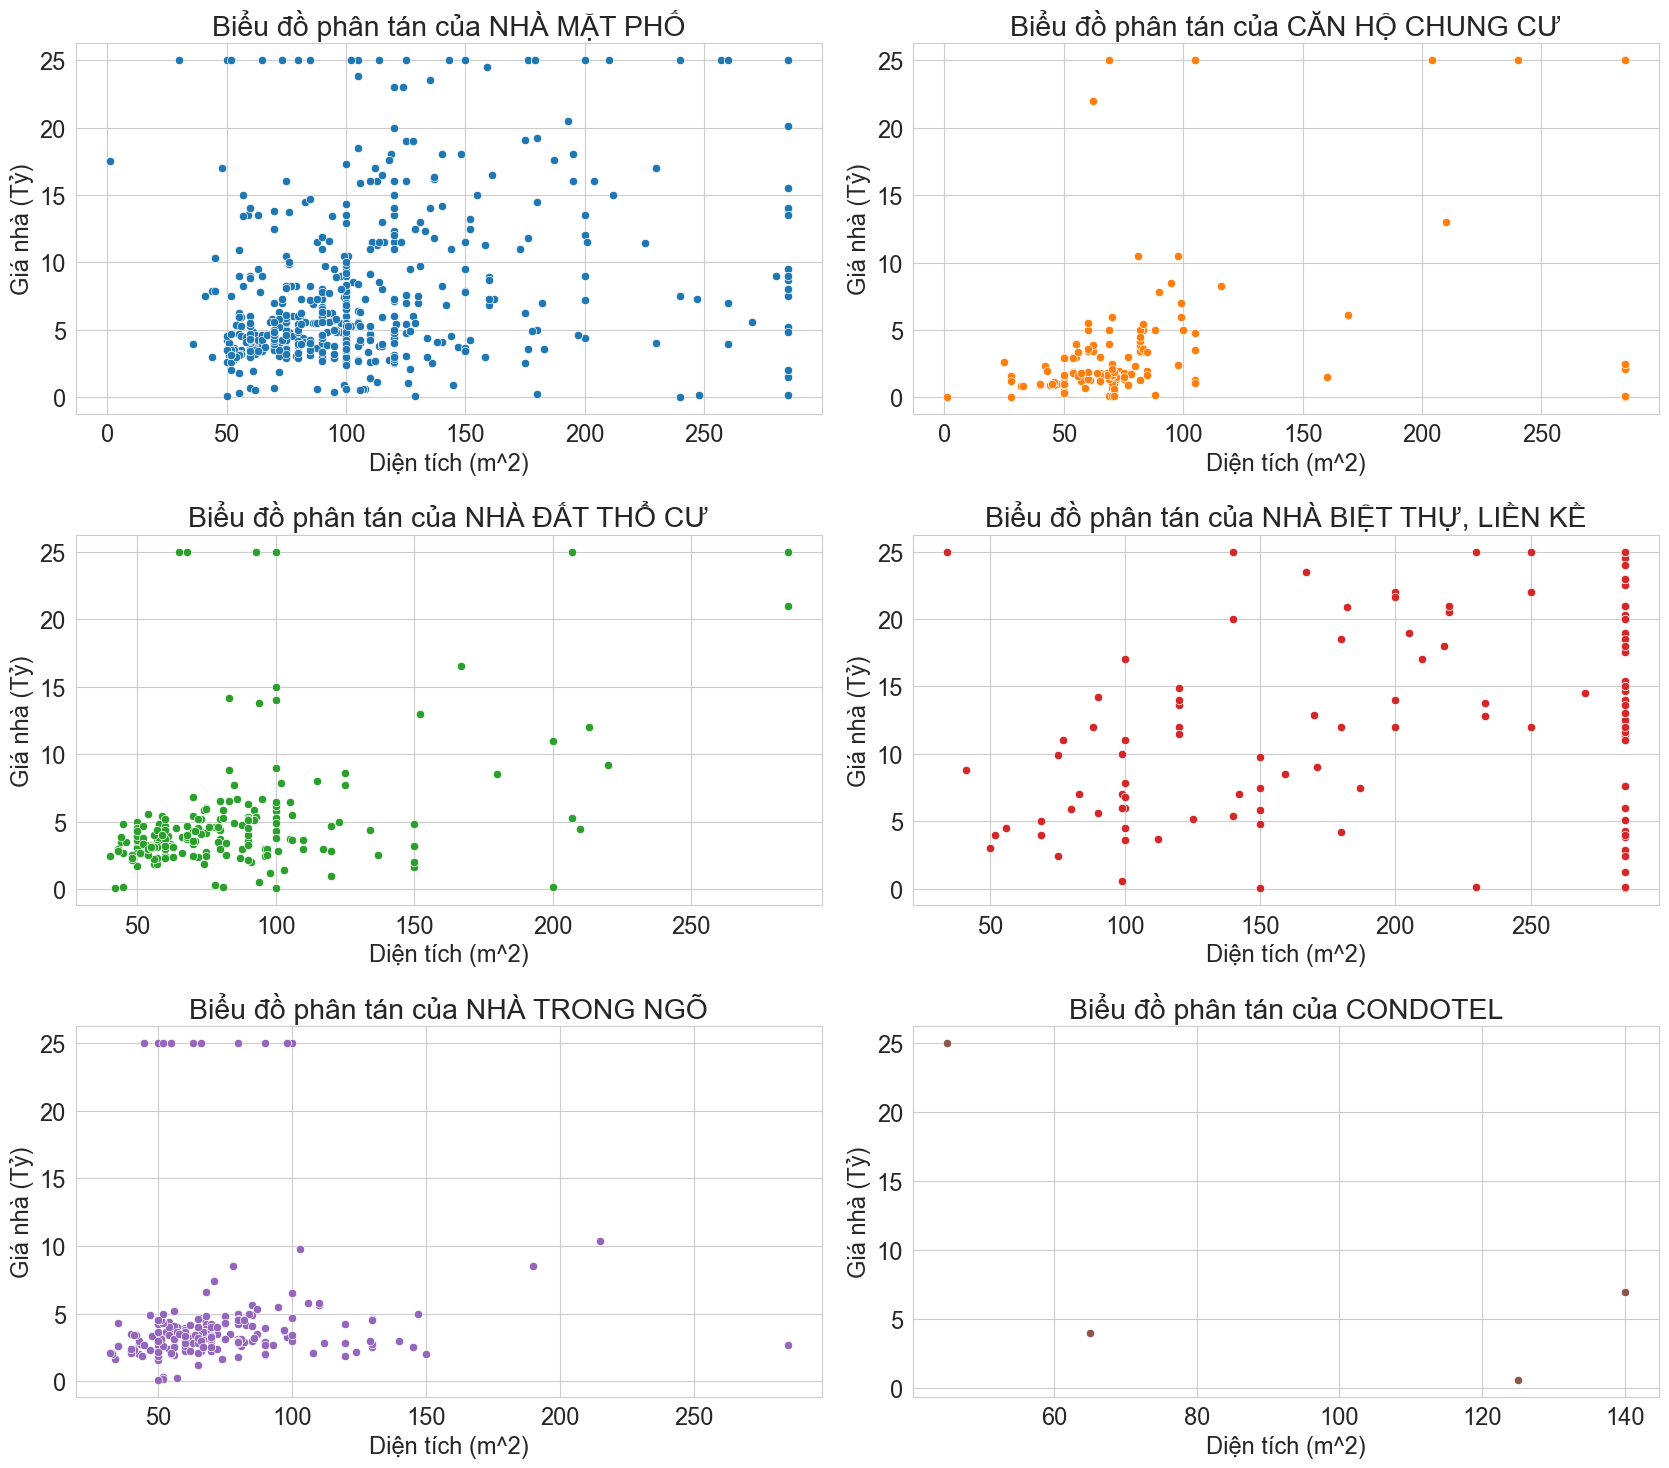

In [42]:
locations = housing['Mô tả vị trí'].unique()
cols = 2
rows = 3
# Tạo figure và axes
fig, axs = plt.subplots(rows, cols, figsize=(17, 15))
# Lặp qua từng loại vị trí và vẽ biểu đồ với màu khác nhau
colors = sns.color_palette(n_colors=len(locations))
for i, (location, color) in enumerate(zip(locations, colors)):
    row = i // cols
    col = i % cols
    sns.scatterplot(data=housing[housing['Mô tả vị trí'] == location], x='Diện tích (m^2)', y='Giá nhà (Tỷ)', ax=axs[row, col], color=color)
    axs[row, col].set_title(f'Biểu đồ phân tán của {location}')
plt.tight_layout()
plt.show()

Hiển thị biểu đồ thể hiện tổng số lượng của các loại nhà bán (Mô tả vị trí) theo từng khu vực

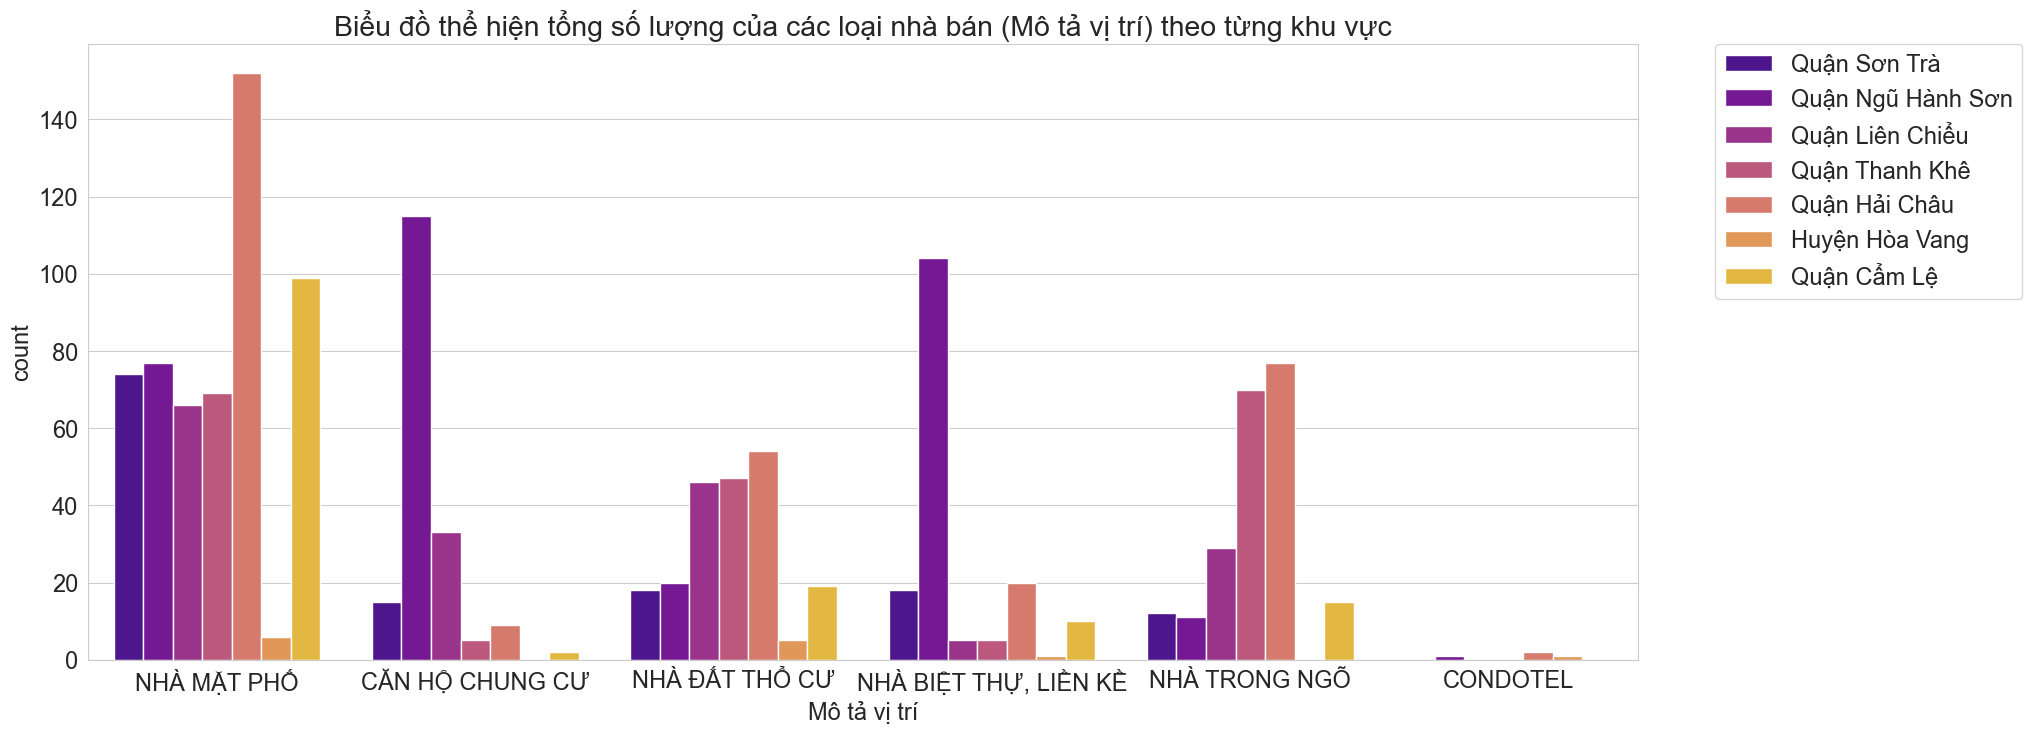

In [10]:
plt.figure(figsize=(20, 8))
plt.rcParams.update({'font.size': 17})
sns.countplot(x='Mô tả vị trí',data=housing,hue='Khu vực',palette='plasma')
# To relocate the legend
plt.title('Biểu đồ thể hiện tổng số lượng của các loại nhà bán (Mô tả vị trí) theo từng khu vực')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Top 3 khu vực có giá bán nhà trung bình cao nhất của từng loại mô tả vị trí

In [11]:
# Tính giá bán nhà trung bình theo khu vực và loại mô tả vị trí
cost_by_district_location = housing.groupby(['Khu vực', 'Mô tả vị trí'])['Giá nhà (Tỷ)'].mean().reset_index()
# Lấy top 3 khu vực có giá bán nhà trung bình cao nhất của loại mô tả vị trí
top3_by_location = cost_by_district_location.groupby('Mô tả vị trí').apply(lambda x: x.nlargest(3, 'Giá nhà (Tỷ)'))
top3_by_location

C:\Users\MY LAPTOP\AppData\Local\Temp\ipykernel_8128\2958337725.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top3_by_location = cost_by_district_location.groupby('Mô tả vị trí').apply(lambda x: x.nlargest(3, 'Giá nhà (Tỷ)'))


Khu vực           Mô tả vị trí  \
Mô tả vị trí                                                         
CONDOTEL              9       Quận Hải Châu               CONDOTEL   
                      20  Quận Ngũ Hành Sơn               CONDOTEL   
                      0      Huyện Hòa Vang               CONDOTEL   
CĂN HỘ CHUNG CƯ       26       Quận Sơn Trà        CĂN HỘ CHUNG CƯ   
                      10      Quận Hải Châu        CĂN HỘ CHUNG CƯ   
                      4         Quận Cẩm Lệ        CĂN HỘ CHUNG CƯ   
NHÀ BIỆT THỰ, LIỀN KỀ 5         Quận Cẩm Lệ  NHÀ BIỆT THỰ, LIỀN KỀ   
                      11      Quận Hải Châu  NHÀ BIỆT THỰ, LIỀN KỀ   
                      22  Quận Ngũ Hành Sơn  NHÀ BIỆT THỰ, LIỀN KỀ   
NHÀ MẶT PHỐ           12      Quận Hải Châu            NHÀ MẶT PHỐ   
                      28       Quận Sơn Trà            NHÀ MẶT PHỐ   
                      23  Quận Ngũ Hành Sơn            NHÀ MẶT PHỐ   
NHÀ TRONG NGÕ         18    Quận Liên Chiểu          NHÀ TRONG NGÕ   
                      29       Quận Sơn Trà          NHÀ TRONG NGÕ   
                      13      Quận Hải Châu          NHÀ TRONG NGÕ   
NHÀ ĐẤT THỔ CƯ        25  Quận Ngũ Hành Sơn         NHÀ ĐẤT THỔ CƯ   
                      30       Quận Sơn Trà         NHÀ ĐẤT THỔ CƯ   
                      8         Quận Cẩm Lệ         NHÀ ĐẤT THỔ CƯ   

                          Giá nhà (Tỷ)  
Mô tả vị trí                            
CONDOTEL              9      16.000000  
                      20      4.000000  
                      0       0.600000  
CĂN HỘ CHUNG CƯ       26      9.537333  
                      10      9.142222  
                      4       4.550000  
NHÀ BIỆT THỰ, LIỀN KỀ 5      17.170000  
                      11     15.582500  
                      22     13.485779  
NHÀ MẶT PHỐ           12      9.388447  
                      28      8.592497  
                      23      7.589312  
NHÀ TRONG NGÕ         18      5.183414  
                      29      5.059167  
                      13      4.514451  
NHÀ ĐẤT THỔ CƯ        25      8.783500  
                      30      6.519407  
                      8       5.590526

Vẽ biểu đồ cho data "Top 3 khu vực có giá bán nhà trung bình cao nhất của từng loại mô tả vị trí" trên

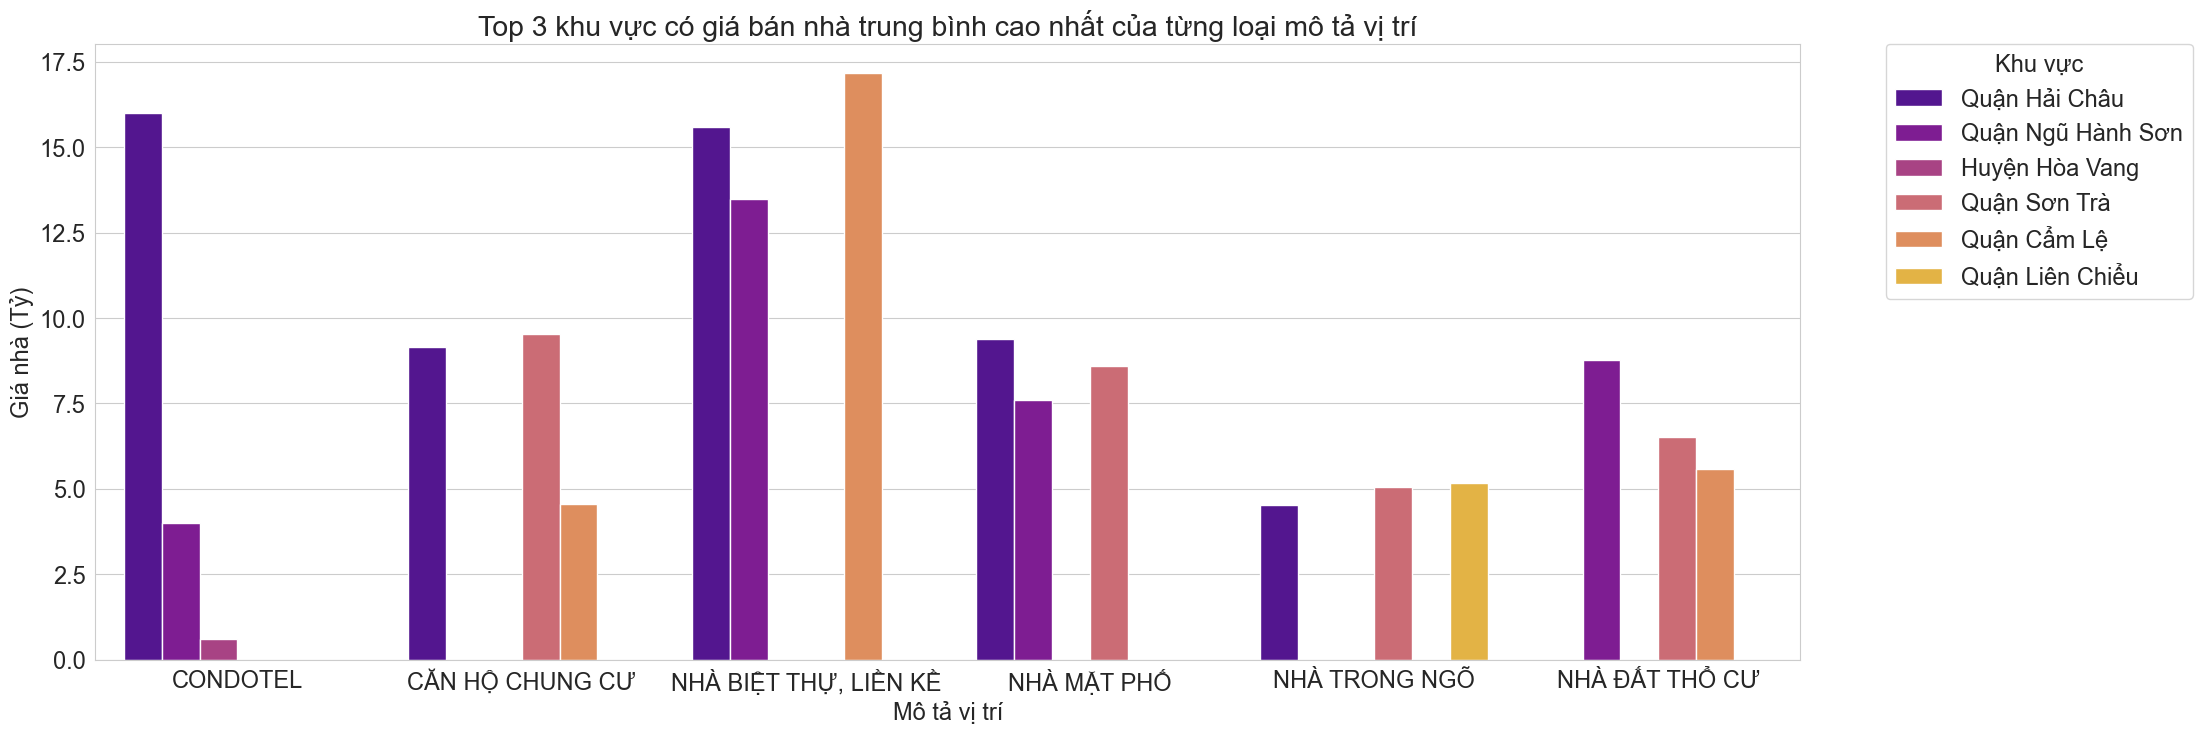

In [12]:
# Vẽ biểu đồ
plt.figure(figsize=(22, 8))
sns.barplot(x='Mô tả vị trí', y='Giá nhà (Tỷ)', hue='Khu vực', data=top3_by_location, palette='plasma')
plt.title('Top 3 khu vực có giá bán nhà trung bình cao nhất của từng loại mô tả vị trí')
plt.xlabel('Mô tả vị trí')
plt.ylabel('Giá nhà (Tỷ)')
plt.legend(title='Khu vực', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Vẽ bản đồ thể hiện Giá nhà trung bình của từng Khu vực (Quận/Huyện) tại Đà Nẵng

C:\Users\MY LAPTOP\AppData\Local\Temp\ipykernel_8128\631428623.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(da_nang.centroid.x, da_nang.centroid.y, da_nang['NAME_2']):


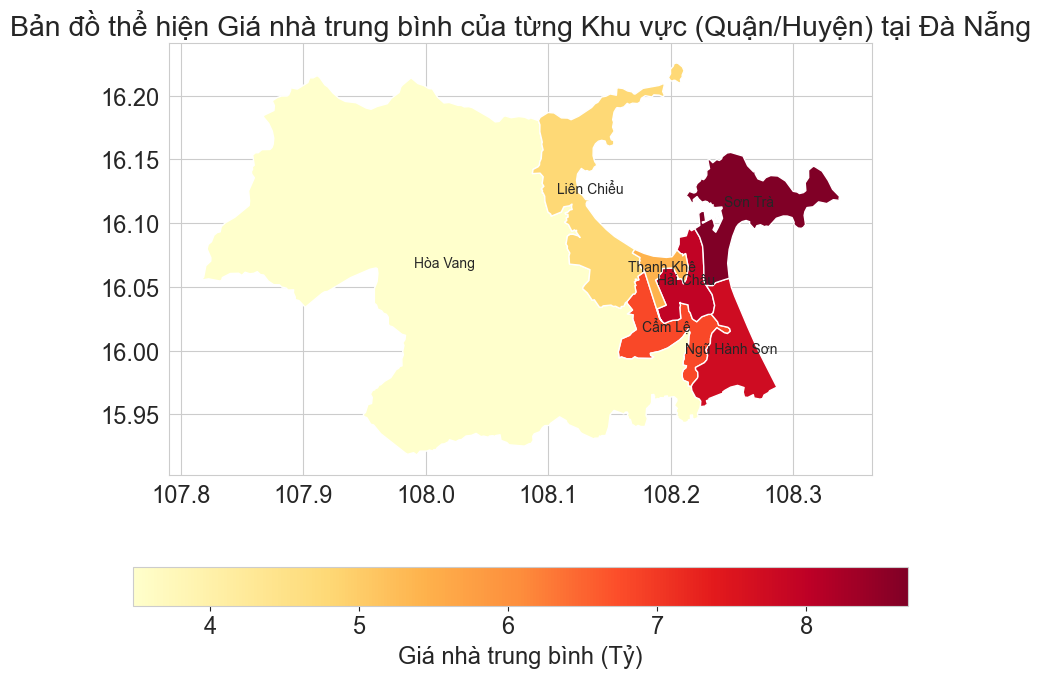

In [40]:
# Load data for district boundaries
gdf = gpd.read_file('..\\gadm41_VNM_shp\\gadm41_VNM_2.shp')
# Mock data for average house prices
data = pd.DataFrame(housing[['Khu vực', 'Giá nhà (Tỷ)']])
data['Khu vực'] = data['Khu vực'].str.replace('Quận ', '')
data['Khu vực'] = data['Khu vực'].str.replace('Huyện ', '')
result = pd.DataFrame(data.groupby('Khu vực')['Giá nhà (Tỷ)'].mean())
# Merge average prices with district data
da_nang = gdf[gdf['NAME_1'] == 'Đà Nẵng']
da_nang = da_nang.merge(result, left_on='NAME_2', right_on='Khu vực')
# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
da_nang.plot(ax=ax, column='Giá nhà (Tỷ)', legend=True, cmap='YlOrRd',
             legend_kwds={'label': "Giá nhà trung bình (Tỷ)", 'orientation': "horizontal"})
# Add annotations for each district
for x, y, label in zip(da_nang.centroid.x, da_nang.centroid.y, da_nang['NAME_2']):
    ax.text(x, y, label, fontsize=10, ha='center')
plt.title('Bản đồ thể hiện Giá nhà trung bình của từng Khu vực (Quận/Huyện) tại Đà Nẵng')
plt.show()

KẾT LUẬN  
- Tất cả 6 biến độc lập: Diện tích, Khu vực, Mô tả vị trí, Mặt tiền, Số phòng ngủ, WC đều đóng vai trò quan trọng trong việc ảnh hưởng đến Giá nhà.  
    + Mô tả vị trí và Khu vực có thể ảnh hưởng đáng kể đến Giá nhà. Chẳng hạn như với những căn nhà ở khu vực đắc địa (Quận Hải Châu, Sơn Trà,...) hoặc có mô tả vị trí đặc biệt (Condotel, Nhà biệt thự,...) thường có giá cao hơn  
    + Diện tích, Mặt tiền và Số phòng ngủ, WC cũng có sự tương quan dương với Giá nhà. Nghĩa là Giá nhà sẽ có xu hướng tăng nếu các yếu tố này cũng tăng  
- Qua đó, từ các mối quan hệ trên có thể hỗ trợ quá trình dự đoán Giá nhà dựa trên các đặc điểm của căn nhà một cách chính xác hơn và hiệu quả hơn.  